In [1]:
import graphlab
import pandas as pd

# Load the motifs data

In [2]:
motifs = pd.read_csv('ensemble1.csv')

In [64]:
all_edges = pd.read_csv('fullgraphs/all_edges.csv', low_memory=False)

In [18]:
motifs.head()

,total_2_1edge,total_2_indep,total_3_tris,total_2_star,total_3_1edge,total_3_indep,total_4_clique,total_4_chordcycle,total_4_tailed_tris,total_4_cycle,total_3_star,total_4_path,total_4_1edge,total_4_2edge,total_4_2star,total_4_tri,total_4_indep,filename
0,1598,1276003,0,1276003,0,678833596,0,0,0,0,678833596,0,0,0,0,0,270684896405,./motifs/1.motifcount
1,1294,836571,0,836571,0,360283244,0,0,0,0,360283244,0,0,0,0,0,116281417001,./motifs/2.motifcount
2,745,277140,0,277140,0,68638340,0,0,0,0,68638340,0,0,0,0,0,12732412070,./motifs/3.motifcount
3,654,206392,0,10358,399152,43898334,0,0,0,20,386456,64297,122234811,138836,5351436,0,6972156145,./motifs/4.motifcount
4,597,177309,0,10745,333725,34940220,0,0,0,1,439224,62277,93903984,104882,4940300,0,5140325797,./motifs/5.motifcount


In [19]:
colmns = motifs.columns.tolist()
colmns = colmns[-1:] + colmns[:-1]
motifs = motifs[colmns]

In [20]:
motifs.head()

,filename,total_2_1edge,total_2_indep,total_3_tris,total_2_star,total_3_1edge,total_3_indep,total_4_clique,total_4_chordcycle,total_4_tailed_tris,total_4_cycle,total_3_star,total_4_path,total_4_1edge,total_4_2edge,total_4_2star,total_4_tri,total_4_indep
0,./motifs/1.motifcount,1598,1276003,0,1276003,0,678833596,0,0,0,0,678833596,0,0,0,0,0,270684896405
1,./motifs/2.motifcount,1294,836571,0,836571,0,360283244,0,0,0,0,360283244,0,0,0,0,0,116281417001
2,./motifs/3.motifcount,745,277140,0,277140,0,68638340,0,0,0,0,68638340,0,0,0,0,0,12732412070
3,./motifs/4.motifcount,654,206392,0,10358,399152,43898334,0,0,0,20,386456,64297,122234811,138836,5351436,0,6972156145
4,./motifs/5.motifcount,597,177309,0,10745,333725,34940220,0,0,0,1,439224,62277,93903984,104882,4940300,0,5140325797


In [21]:
filenames = motifs['filename']

In [22]:
del motifs['filename']
indexes = motifs.columns

## Normalize the rows

In [23]:
tmotifs = motifs.transpose()

In [24]:
tmotifs.head()

,0,1,2,3,4,5,6,7,8,9,...,4638,4639,4640,4641,4642,4643,4644,4645,4646,4647
total_2_1edge,1598,1294,745,654,597,560,408,503,386,377,...,3,3,3,3,3,3,3,3,3,3
total_2_indep,1276003,836571,277140,206392,177309,156520,83028,81712,74305,70876,...,3,3,3,3,3,3,3,3,3,3
total_3_tris,0,0,0,0,0,0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
total_2_star,1276003,836571,277140,10358,10745,156520,54765,3643,73921,70127,...,2,3,3,2,2,3,2,3,2,2
total_3_1edge,0,0,0,399152,333725,0,56526,195884,768,1498,...,2,0,0,2,2,0,2,0,2,2


In [25]:
from sklearn import preprocessing

In [26]:
columns = tmotifs.columns

In [27]:
std_scale = preprocessing.MinMaxScaler().fit(tmotifs[columns])

In [28]:
tmotif_std = std_scale.transform(tmotifs[columns])

In [29]:
tmotifs = pd.DataFrame(tmotif_std, index=indexes)

In [30]:
tmotifs = tmotifs.transpose()
tmotifs.head()

,total_2_1edge,total_2_indep,total_3_tris,total_2_star,total_3_1edge,total_3_indep,total_4_clique,total_4_chordcycle,total_4_tailed_tris,total_4_cycle,total_3_star,total_4_path,total_4_1edge,total_4_2edge,total_4_2star,total_4_tri,total_4_indep
0,5.903543e-09,0.000005,0.0,0.000005,0.000000,0.002508,0.0,0.0,0.0,0.000000e+00,0.002508,0.000000,0.000000,0.00000,0.000000,0.0,1.0
1,1.112818e-08,0.000007,0.0,0.000007,0.000000,0.003098,0.0,0.0,0.0,0.000000e+00,0.003098,0.000000,0.000000,0.00000,0.000000,0.0,1.0
2,5.851209e-08,0.000022,0.0,0.000022,0.000000,0.005391,0.0,0.0,0.0,0.000000e+00,0.005391,0.000000,0.000000,0.00000,0.000000,0.0,1.0
3,9.380169e-08,0.000030,0.0,0.000001,0.000057,0.006296,0.0,0.0,0.0,2.868553e-09,0.000055,0.000009,0.017532,0.00002,0.000768,0.0,1.0
4,1.161405e-07,0.000034,0.0,0.000002,0.000065,0.006797,0.0,0.0,0.0,1.945402e-10,0.000085,0.000012,0.018268,0.00002,0.000961,0.0,1.0


In [31]:
tmotifs['filename'] = filenames[:]

## Build a kmeans clustering model

In [32]:
graph_data = graphlab.SFrame(tmotifs)

In [33]:
simple_3_model = graphlab.kmeans.create(graph_data, num_clusters=3, label='filename')

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 1278      |

| 1             | 3666      |

| 2             | 1798      |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 198                           |

| 2         | 66                            |

| 3         | 27                            |

| 4         | 21                            |

| 5         | 5                             |

| 6         | 0                             |

+-----------+-------------------------------+

In [34]:
cluster_ids = simple_3_model['cluster_id']

In [35]:
graphs_cluster0 = cluster_ids[cluster_ids['cluster_id'] == 0]
graphs_cluster1 = cluster_ids[cluster_ids['cluster_id'] == 1]
graphs_cluster2 = cluster_ids[cluster_ids['cluster_id'] == 2]

In [46]:
graphs_cluster1.sort('distance')

filename,cluster_id,distance
./motifs/3407.motifcount,1,0.441151171923
./motifs/3425.motifcount,1,0.441151171923
./motifs/3430.motifcount,1,0.441151171923
./motifs/3365.motifcount,1,0.441151171923
./motifs/3364.motifcount,1,0.441151171923
./motifs/3361.motifcount,1,0.441151171923
./motifs/3447.motifcount,1,0.441151171923
./motifs/3448.motifcount,1,0.441151171923
./motifs/3353.motifcount,1,0.441151171923
./motifs/3345.motifcount,1,0.441151171923


In [48]:
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

In [49]:
import json
with open('fullgraphs/all_nodes_type.json') as data_file:    
    data = json.load(data_file)

In [73]:
G_1 = nx.read_adjlist("subgraphs/3430-subgraph.adjlist")
label = {}
for edge in G_1.edges():
    print edge
#nx.draw_networkx(G_1,pos=nx.spring_layout(G_1), labels=label)

(u'11005328', u'10092985')
(u'10092985', u'12139925')
(u'10092985', u'12139927')
(u'10092985', u'12139926')
(u'14029727', u'12139925')
(u'14029727', u'12139927')
(u'14029727', u'12139926')


In [75]:
all_edges[ (all_edges['node_1'] == 10092985) && (all_edges['node_2'] == 11005328) ]

SyntaxError: invalid syntax (<ipython-input-75-c8e378fde79a>, line 1)

filename,cluster_id,distance
./motifs/2187.motifcount,1,0.232016041875
./motifs/2384.motifcount,1,0.232016041875
./motifs/2382.motifcount,1,0.232016041875
./motifs/2378.motifcount,1,0.232016041875
./motifs/2374.motifcount,1,0.232016041875
./motifs/2369.motifcount,1,0.232016041875
./motifs/2365.motifcount,1,0.232016041875
./motifs/2364.motifcount,1,0.232016041875
./motifs/2361.motifcount,1,0.232016041875
./motifs/2357.motifcount,1,0.232016041875


{u'10077053': u'entitities', u'11010669': u'intermediates', u'10071219': u'entitities', u'10063989': u'entitities', u'10071206': u'entitities', u'10070026': u'entitities', u'10060865': u'entitities', u'10064431': u'entitities'}


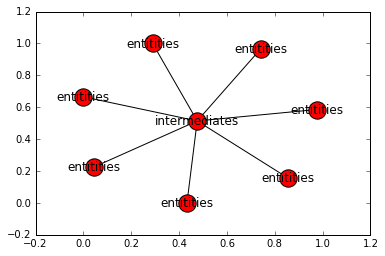

In [133]:
G_3 =  nx.read_adjlist("subgraphs/2187-subgraph.adjlist")
label = {}
for node in G_3:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_3,pos=nx.spring_layout(G_3), labels=label)

{u'12092774': u'officers', u'12092775': u'officers', u'12092776': u'officers', u'12092777': u'officers', u'10029448': u'entitities', u'12092773': u'officers', u'12093051': u'officers', u'11002520': u'intermediates'}


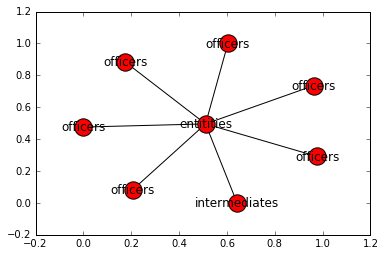

In [134]:
G_4 =  nx.read_adjlist("subgraphs/2384-subgraph.adjlist")
label = {}
for node in G_4:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_4,pos=nx.spring_layout(G_4), labels=label)

In [88]:
graphs_cluster2.sort('distance')

filename,cluster_id,distance
./motifs/4683.motifcount,2,0.00290215667337
./motifs/4353.motifcount,2,0.00290215667337
./motifs/4357.motifcount,2,0.00290215667337
./motifs/4358.motifcount,2,0.00290215667337
./motifs/4364.motifcount,2,0.00290215667337
./motifs/4366.motifcount,2,0.00290215667337
./motifs/4369.motifcount,2,0.00290215667337
./motifs/4371.motifcount,2,0.00290215667337
./motifs/4372.motifcount,2,0.00290215667337
./motifs/4375.motifcount,2,0.00290215667337


In [92]:
G_5 =  nx.read_adjlist("subgraphs/4683-subgraph.adjlist")
#nx.draw(G_5,pos=nx.spring_layout(G_5))
for node in G_5:
    print node

298417
285809
189290
263517


In [93]:
import json
with open('fullgraphs/all_nodes_type.json') as data_file:    
    data = json.load(data_file)

In [128]:
label = {}
for node in G_5:
    print data[str(node)]

{u'node_type': u'intermediates'}
{u'node_type': u'address'}
{u'node_type': u'entitities'}
{u'node_type': u'address'}


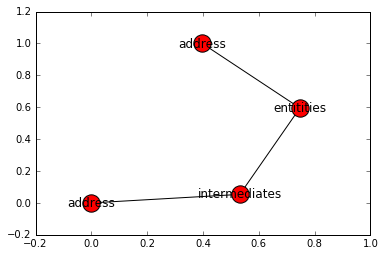

In [118]:
nx.draw_networkx(G_5,pos=nx.spring_layout(G_5),labels=label)

In [121]:
G_6 =  nx.read_adjlist("subgraphs/4357-subgraph.adjlist")
print G_6.nodes()

[u'12119515', u'11008784', u'10205283', u'14022097']


{u'11008784': u'intermediates', u'10205283': u'entitities', u'12119515': u'officers', u'14022097': u'address'}


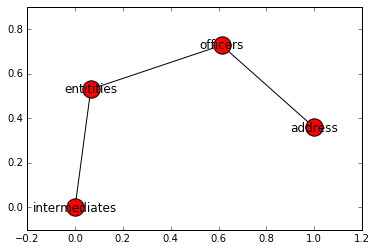

In [122]:
label = {}
for node in G_6:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_6,pos=nx.spring_layout(G_6), labels=label)

In [66]:
graphs_cluster3 = cluster_ids[cluster_ids['cluster_id'] == 3]
graphs_cluster4 = cluster_ids[cluster_ids['cluster_id'] == 4]
graphs_cluster5 = cluster_ids[cluster_ids['cluster_id'] == 5]

In [67]:
graphs_cluster3.sort('distance')

filename,cluster_id,distance
./motifs/3062.motifcount,3,0.150766924024
./motifs/3607.motifcount,3,0.150766924024
./motifs/3606.motifcount,3,0.150766924024
./motifs/3605.motifcount,3,0.150766924024
./motifs/3603.motifcount,3,0.150766924024
./motifs/3602.motifcount,3,0.150766924024
./motifs/3601.motifcount,3,0.150766924024
./motifs/3598.motifcount,3,0.150766924024
./motifs/3594.motifcount,3,0.150766924024
./motifs/3593.motifcount,3,0.150766924024


{u'11000388': u'intermediates', u'10006962': u'entitities', u'10036133': u'entitities', u'10035416': u'entitities', u'10190578': u'entitities', u'10033640': u'entitities'}


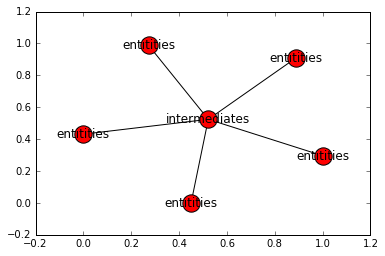

In [124]:
G_7 =  nx.read_adjlist("subgraphs/3062-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)

{u'10067878': u'entitities', u'12063288': u'officers', u'12063289': u'officers', u'11007429': u'intermediates', u'12063286': u'officers', u'12063287': u'officers'}


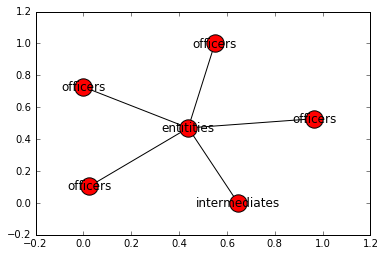

In [125]:
G_7 =  nx.read_adjlist("subgraphs/3607-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)

In [70]:
graphs_cluster4.sort('distance')

filename,cluster_id,distance
./motifs/4997.motifcount,4,0.310309410095
./motifs/4995.motifcount,4,0.310309410095
./motifs/4989.motifcount,4,0.310309410095
./motifs/4988.motifcount,4,0.310309410095
./motifs/4984.motifcount,4,0.310309410095
./motifs/4983.motifcount,4,0.310309410095
./motifs/4979.motifcount,4,0.310309410095
./motifs/4978.motifcount,4,0.310309410095
./motifs/4976.motifcount,4,0.310309410095
./motifs/4974.motifcount,4,0.310309410095


{u'110677': u'officers', u'164887': u'entitities', u'182326': u'entitities', u'238648': u'address'}


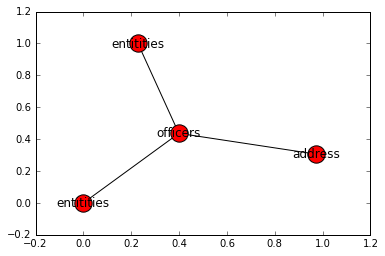

In [126]:
G_7 =  nx.read_adjlist("subgraphs/4997-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)

{u'12056682': u'officers', u'11002577': u'intermediates', u'10044954': u'entitities', u'12057411': u'officers'}


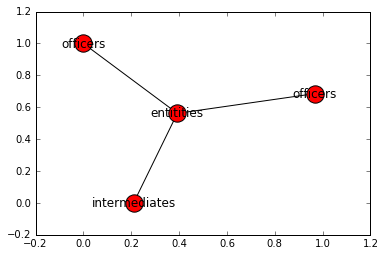

In [157]:
G_7 =  nx.read_adjlist("subgraphs/4984-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)

In [73]:
graphs_cluster5.sort('distance')

filename,cluster_id,distance
./motifs/2587.motifcount,5,0.363626509905
./motifs/2596.motifcount,5,0.363626509905
./motifs/2696.motifcount,5,0.363626509905
./motifs/2558.motifcount,5,0.363626509905
./motifs/2632.motifcount,5,0.363626509905
./motifs/2713.motifcount,5,0.363626509905
./motifs/2669.motifcount,5,0.363626509905
./motifs/2464.motifcount,5,0.363626509905
./motifs/2700.motifcount,5,0.363626509905
./motifs/2223.motifcount,5,0.392443150282


{u'181185': u'entitities', u'271445': u'address', u'286561': u'address', u'250658': u'address', u'164664': u'entitities', u'291042': u'intermediates', u'97267': u'officers'}


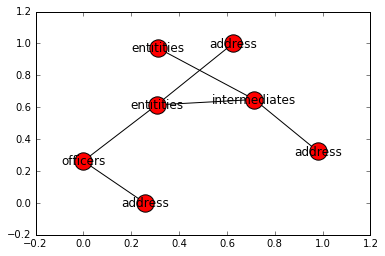

In [129]:
G_7 =  nx.read_adjlist("subgraphs/2587-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)

In [137]:
G_7 =  nx.read_adjlist("subgraphs/2596-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
details = {}
import csv
officers = pd.read_csv('fullgraphs/Officers.csv', low_memory=False)

{u'296620': u'intermediates', u'68923': u'address', u'81084': u'officers', u'286539': u'address', u'100639': u'officers', u'135806': u'entitities', u'188071': u'entitities'}


In [141]:
officers.head()

,name,icij_id,country_codes,countries,node_id,sourceID,note
0,KIM SOO IN,E72326DEA50F1A9C2876E112AAEB42BC,KOR,South Korea,12000001,Panama Papers,NaN
1,Tian Yuan,58287E0FD37852000D9D5AB8B27A2581,CHN,China,12000002,Panama Papers,NaN
2,GREGORY JOHN SOLOMON,F476011509FD5C2EF98E9B1D74913CCE,AUS,Australia,12000003,Panama Papers,NaN
3,MATSUDA MASUMI,974F420B2324A23EAF46F20E178AF52C,JPN,Japan,12000004,Panama Papers,NaN
4,HO THUY NGA,06A0FC92656D09F63D966FE7BD076A45,VNM,Viet Nam,12000005,Panama Papers,NaN


In [147]:
officers[ officers['node_id'] == 81084]
officers[ officers['node_id'] == 100639]

,name,icij_id,country_codes,countries,node_id,sourceID,note
267466,Walmert China Co Ltd,NaN,XXX,Not identified,100639,Offshore Leaks,NaN


In [144]:
print label

{u'296620': u'intermediates', u'68923': u'address', u'81084': u'officers', u'286539': u'address', u'100639': u'officers', u'135806': u'entitities', u'188071': u'entitities'}


{u'163325': u'entitities', u'2003948': u'officers', u'273423': u'address', u'297063': u'intermediates', u'81752': u'officers', u'273448': u'address', u'188595': u'entitities'}


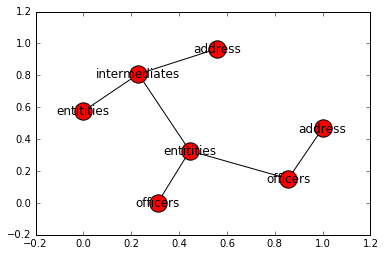

In [153]:
G_7 =  nx.read_adjlist("subgraphs/2696-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)

In [154]:
officers[ officers['node_id'] == 81752 ]

,name,icij_id,country_codes,countries,node_id,sourceID,note
250740,"WU, CHUN-I @ WU, JIMMY",NaN,TWN,Taiwan,81752,Offshore Leaks,NaN


{u'189136': u'entitities', u'72882': u'officers', u'164190': u'entitities', u'238261': u'address'}


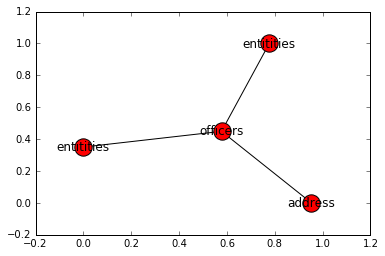

In [162]:
G_7 =  nx.read_adjlist("subgraphs/4979-subgraph.adjlist")
label = {}
for node in G_7:
    label[node] = data[str(node)]['node_type']
print label
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)

In [163]:
officers[ officers['node_id'] == 72882 ]

,name,icij_id,country_codes,countries,node_id,sourceID,note
243724,"YANG, SHAO-PING",NaN,TWN,Taiwan,72882,Offshore Leaks,NaN


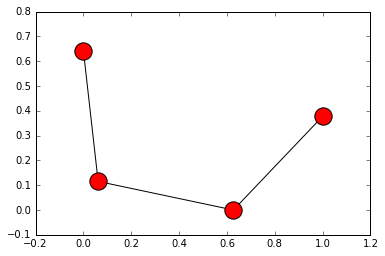

In [15]:
G_7 =  nx.read_adjlist("subgraphs/4872-subgraph.adjlist")
nx.draw_networkx(G_7,pos=nx.spring_layout(G_7), labels=label)